In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits import mplot3d
from random import sample 
import scipy.integrate as integrate
import seaborn as sns
import random
np.random.seed(1)
%matplotlib inline

In [2]:
R,r=30,1.5 # in units of h^{-1}Mpc
N,n,nsample=2500,50,50

Defining a $N$ random set of positions for galaxies (arbitrary and random) in a box with dimentions $r^3$

In [3]:
int1,int2=24,24
xdata=np.random.uniform(-int1,int1,N)
ydata=np.random.uniform(-int2,int2,N)#np.random.random(N)*1000
xcenters=np.random.uniform(-int1,int1,n)
ycenters=np.random.uniform(-int2,int2,n)
data=pd.DataFrame({'x':xdata,'y':ydata})
data_c=pd.DataFrame({'x':xcenters,'y':ycenters})
data_s=data.sample(nsample)

In [4]:
#data_s

In [5]:
#data

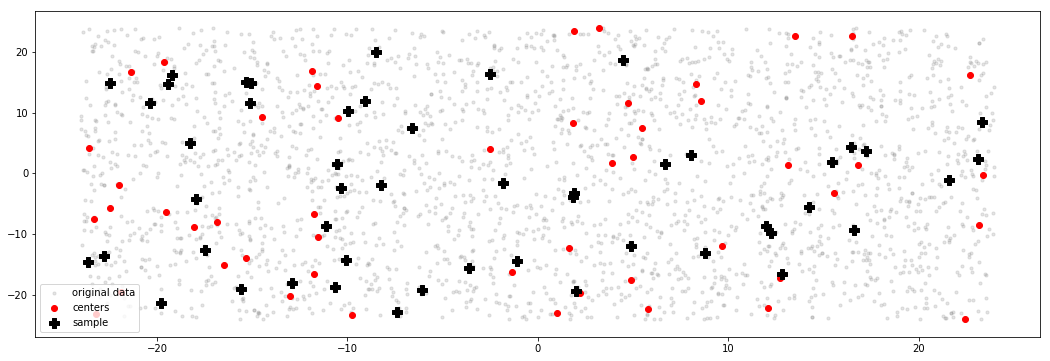

In [6]:
plt.figure(figsize=(18,6))
plt.scatter(data.x,data.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(data_c.x,data_c.y,label="centers",color='r')
plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()
plt.show()

The nearest neighbor function $G(r)$ is the distribution function of the distance $r$ of a point (existing in the data) to the nearest other point, while the spherical contact distribution $F(r)$ is the distribution function
of the distance $r$ of an arbitrary point in the space (not necessarily existing in the data) to the nearest point in the data [34]. In addition, another function, $J(r)$, has been suggested by van Lieshout and Baddeley in 1996 [35], $J(r)=\frac{1-G(r)}{1-F(r)}$, as a better nonparametric test to determine whether data were from a Poisson process.

Jiang S, Park S, Challapalli SD, Fei J, Wang Y (2017) Robust nonparametric quantification of clustering density of molecules in single-molecule localization microscopy. PLoS ONE 12(6): e0179975. https://doi.org/10.1371/journal.pone.0179975

The intersection area between two circles is

$$A_{inter}=r^2cos^{-1}\left(\frac{d^2+r^2-R^2}{2dr}\right)+R^2cos^{-1}\left(\frac{d^2+R^2-r^2}{2dR}\right)-\frac{1}{2}\sqrt{(-d+r+R)(d+r-R)(d-r+R)(d+r+R)}.$$

In [7]:
def area_in(d,R,r):
    t1=r**2*np.arccos((d**2+r**2-R**2)/(2*d*r))
    t2=R**2*np.arccos((d**2+R**2-r**2)/(2*d*R))
    t3=np.sqrt((-d+r+R)*(d+r-R)*(d-r+R)*(d+r+R))/2
    return t1+t2+t3

In [8]:
dist_f=[]
for RR_i, RR in enumerate(data_c.iterrows()):
    for rr_j, rr in enumerate(data.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_f.append(dd)
dist_f=np.array(dist_f)

In [9]:
dist_g=[]
for RR_i, RR in enumerate(data_s.iterrows()):
    for rr_j, rr in enumerate(data.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_g.append(dd)
dist_g=np.array(dist_g)

In [10]:
len(dist_f), len(dist_g), dist_f

(125000,
 125000,
 array([16.15577678,  9.53056905, 32.89083749, ..., 24.93317082,
        15.9499008 , 22.46654855]))

In [11]:
dist_f.min(), dist_f.max(), dist_g.min(), dist_g.max(), np.count_nonzero(dist_f), len(dist_f)

(0.03332482072402404,
 66.27042243324787,
 0.0,
 61.19239970965184,
 125000,
 125000)

In [12]:
def double_hist(data1,data2,mini=0,maxi=R+1,delta=.1):
    bin_center,counts_f,counts_g=[],[],[]
    bins=np.arange(mini,maxi,delta)
    for i, b_min in enumerate(bins):
        b_max = b_min + delta
        b_center=(b_min)#+b_max)/2
        ii1 = (data1>=b_min) & (data1<b_max)
        ii2 = (data2>=b_min) & (data2<b_max)
        n1=np.count_nonzero(ii1)
        n2=np.count_nonzero(ii2)
        n1_tot=np.count_nonzero(np.count_nonzero(ii1))
        n2_tot=np.count_nonzero(np.count_nonzero(ii2))
        #print(b_min, b_max, n1, n2, n1_tot, n2_tot)
        bin_center.append(b_center)
        counts_f.append(np.cumsum(n1))
        counts_g.append(np.cumsum(n2))
    bin_center,counts_f,counts_g=np.array(bin_center),np.array(counts_f),np.array(counts_g) 
    F_r=counts_f/counts_f[-1]
    G_r=counts_g/counts_g[-1]
    J_r=(1-G_r)/(1-F_r)
    return bin_center, np.array(F_r), G_r, J_r

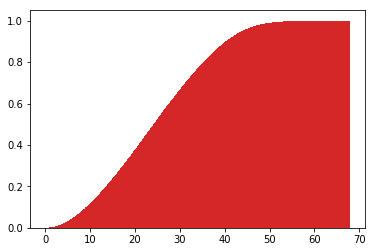

In [13]:
rs_f=plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r=plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g=plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r=plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [14]:
J_r=(1-G_r)/(1-F_r)

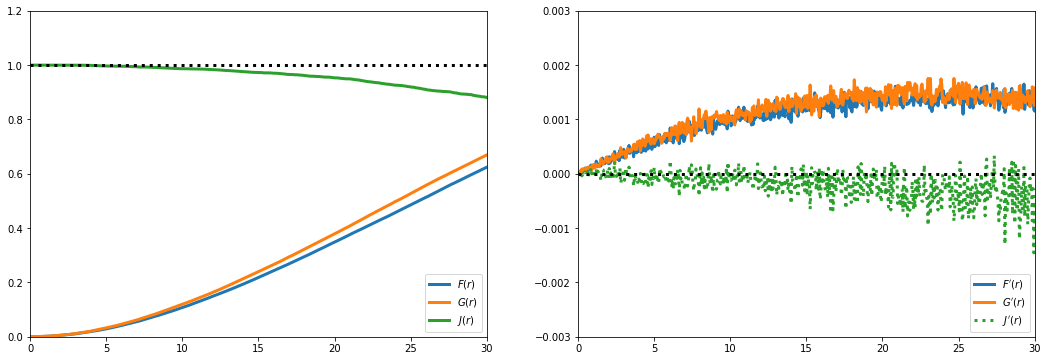

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(rs_f[:-1],F_r,label=r"$F(r)$",lw=3)
plt.plot(rs_g[:-1],G_r,label=r"$G(r)$",lw=3)
plt.plot(rs_f[:-1],J_r,label=r"$J(r)$",lw=3)
plt.axhline(1,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.plot(rs_f[:-2],np.diff(F_r),label=r"$F'(r)$",lw=3)
plt.plot(rs_g[:-2],np.diff(G_r),label=r"$G'(r)$",lw=3)
plt.plot(rs_f[:-2],np.diff(J_r),label=r"$J'(r)$",linestyle=':',lw=3)
plt.axhline(0,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.show()

Now, we generate a set of grouped values for clustering situation. In this case we generate 5 cluster disperse into de original data. We now recalculate one more time the three functions and construct density distributions.

In [16]:
circle_r = 4
circle_x=np.array([-20,-10,20,5,-3])#np.random.randint(-int1,int1,5)
circle_y=np.array([10,-10,0,-18,12])#np.random.randint(-int1,int1,5)
# random angle
#alpha = 2 * np.pi * np.random.random(500)
# random radius
#r = circle_r * np.random.random(500)
#circle_x

In [17]:
# calculating coordinates
x_poisson,y_poisson=[],[]
for i, j in zip(circle_x,circle_y):
    # random angle
    alpha = 2 * np.pi * np.random.random(3500)
    # random radius
    r = circle_r * np.random.random(3500)
    x1 = r * np.cos(alpha) + i
    y1 = r * np.sin(alpha) + j
    #print(i,j,x1,y1)
    x_poisson.append(x1)
    y_poisson.append(y1)
x_poisson,y_poisson=np.array(x_poisson),np.array(y_poisson)

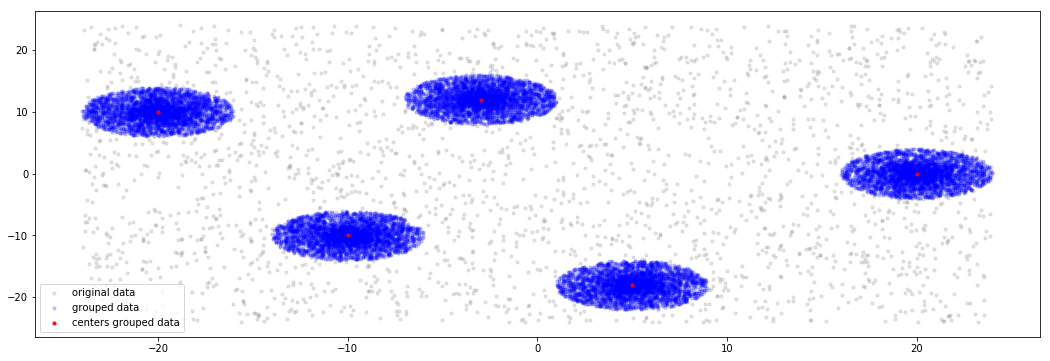

In [18]:
plt.figure(figsize=(18,6))
plt.scatter(data.x,data.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(x_poisson,y_poisson,label="grouped data",color='b',alpha=0.2,s=10)
plt.scatter(circle_x,circle_y,label="centers grouped data",color='r',alpha=0.9,s=10)
#plt.scatter(data_c.x,data_c.y,label="centers",color='r')
#plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()
plt.show()

In [19]:
xdata_new=np.concatenate((xdata,x_poisson[0],x_poisson[1],x_poisson[2],x_poisson[3],x_poisson[4]))
ydata_new=np.concatenate((ydata,y_poisson[0],y_poisson[1],y_poisson[2],y_poisson[3],y_poisson[4]))
data_new=pd.DataFrame({'x':xdata_new,'y':ydata_new})
data_c=pd.DataFrame({'x':xcenters,'y':ycenters})
data_s=data_new.sample(nsample)

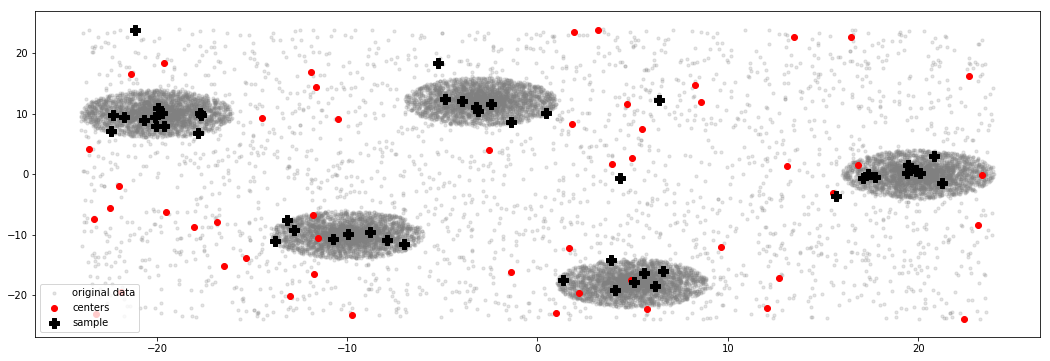

In [20]:
plt.figure(figsize=(18,6))
plt.scatter(data_new.x,data_new.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(data_c.x,data_c.y,label="centers",color='r')
plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()
plt.show()

In [21]:
dist_f_new=[]
for RR_i, RR in enumerate(data_c.iterrows()):
    for rr_j, rr in enumerate(data_new.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_f_new.append(dd)
dist_f_new=np.array(dist_f_new)

In [22]:
dist_g_new=[]
for RR_i, RR in enumerate(data_s.iterrows()):
    for rr_j, rr in enumerate(data_new.iterrows()):
        dd=np.sqrt((RR[1][0]-rr[1][0])**2+(RR[1][1]-rr[1][1])**2)
        #if dd<=R*1.2:
        #print(RR_i, RR[1][0], RR[1][1], rr_j, rr[1][0], rr[1][1], dd)
        dist_g_new.append(dd)
dist_g_new=np.array(dist_g_new)

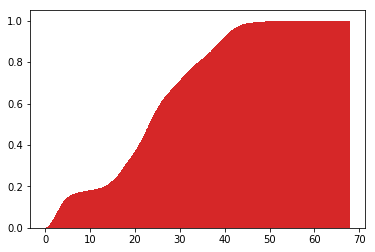

In [23]:
rs_f_new=plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r_new=plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g_new=plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r_new=plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [24]:
J_r_new=(1-G_r_new)/(1-F_r_new)

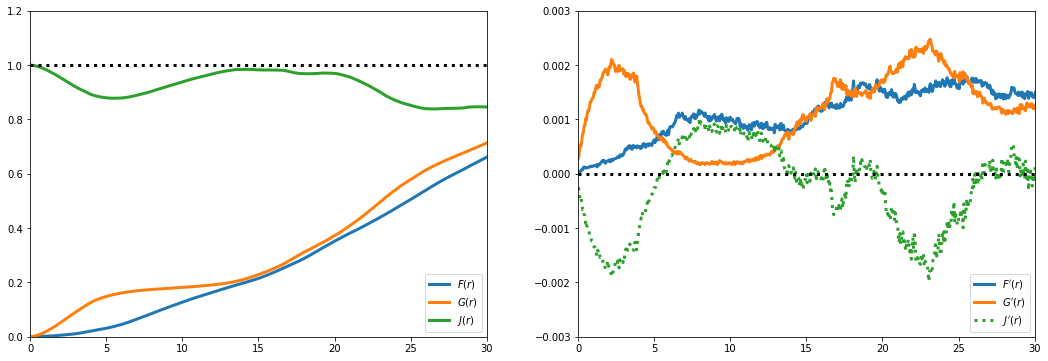

In [25]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(rs_f_new[:-1],F_r_new,label=r"$F(r)$",lw=3)
plt.plot(rs_g_new[:-1],G_r_new,label=r"$G(r)$",lw=3)
plt.plot(rs_f_new[:-1],J_r_new,label=r"$J(r)$",lw=3)
plt.axhline(1,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.plot(rs_f_new[:-2],np.diff(F_r_new),label=r"$F'(r)$",lw=3)
plt.plot(rs_g_new[:-2],np.diff(G_r_new),label=r"$G'(r)$",lw=3)
plt.plot(rs_f_new[:-2],np.diff(J_r_new),label=r"$J'(r)$",linestyle=':',lw=3)
plt.axhline(0,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.show()

In [26]:
len(data_new), len(data)

(20000, 2500)

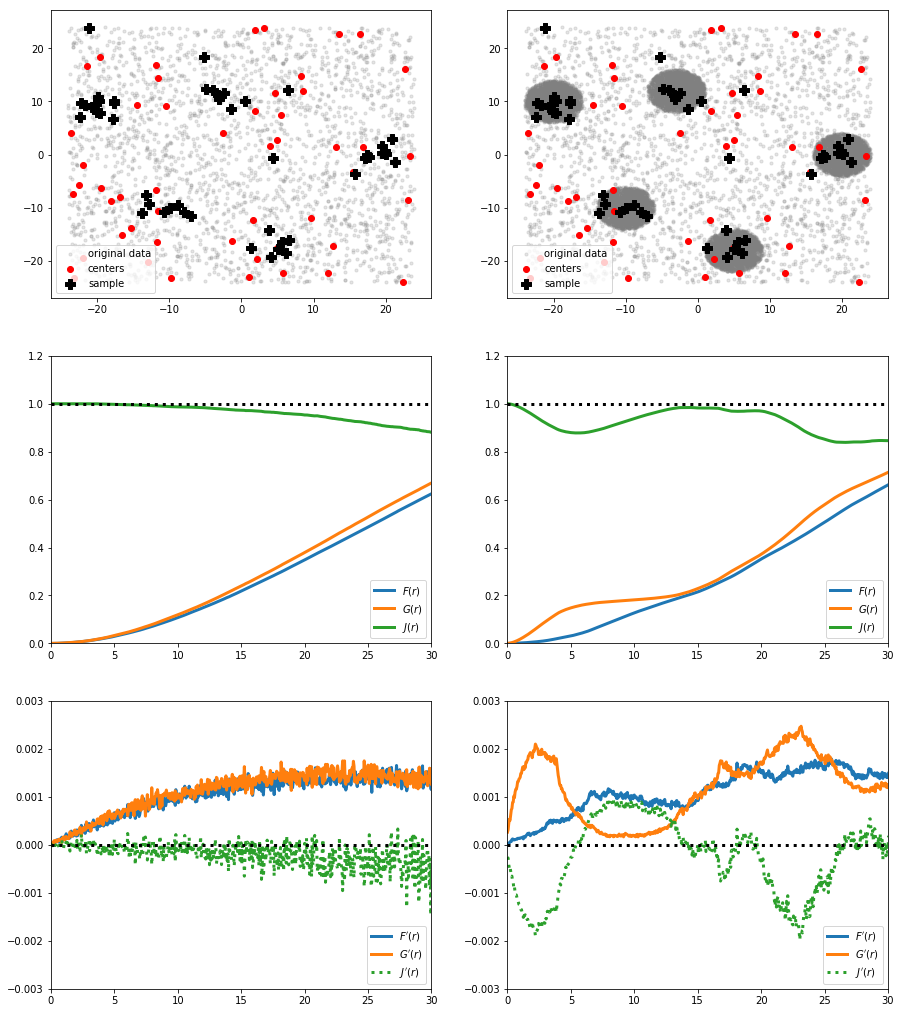

In [27]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
plt.scatter(data.x,data.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(data_c.x,data_c.y,label="centers",color='r')
plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()

plt.subplot(3,2,3)
plt.plot(rs_f[:-1],F_r,label=r"$F(r)$",lw=3)
plt.plot(rs_g[:-1],G_r,label=r"$G(r)$",lw=3)
plt.plot(rs_f[:-1],J_r,label=r"$J(r)$",lw=3)
plt.axhline(1,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,5)
plt.plot(rs_f[:-2],np.diff(F_r),label=r"$F'(r)$",lw=3)
plt.plot(rs_g[:-2],np.diff(G_r),label=r"$G'(r)$",lw=3)
plt.plot(rs_f[:-2],np.diff(J_r),label=r"$J'(r)$",linestyle=':',lw=3)
plt.axhline(0,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.subplot(3,2,2)
plt.scatter(data_new.x,data_new.y,label="original data",color='grey',alpha=0.2,s=10)
plt.scatter(data_c.x,data_c.y,label="centers",color='r')
plt.scatter(data_s.x,data_s.y,label="sample",color='k',marker='P',s=100)
plt.legend()

plt.subplot(3,2,4)
plt.plot(rs_f_new[:-1],F_r_new,label=r"$F(r)$",lw=3)
plt.plot(rs_g_new[:-1],G_r_new,label=r"$G(r)$",lw=3)
plt.plot(rs_f_new[:-1],J_r_new,label=r"$J(r)$",lw=3)
plt.axhline(1,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,6)
plt.plot(rs_f_new[:-2],np.diff(F_r_new),label=r"$F'(r)$",lw=3)
plt.plot(rs_g_new[:-2],np.diff(G_r_new),label=r"$G'(r)$",lw=3)
plt.plot(rs_f_new[:-2],np.diff(J_r_new),label=r"$J'(r)$",linestyle=':',lw=3)
plt.axhline(0,lw=3,linestyle=':',color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)


plt.show()